# PVT Systems Exercise

This notebook uses Google Colab, a free no-installation tool for running Python code from your web browser.

Notebooks are organized by text and code "cells".  You can double-click a cell to start editing a cell.  To render a text cell, or execute a code cell, hit shift+enter.

## Step 1: Install pvlib

pvlib is a Python package for simulating the performance of PV systems and accomplishing related tasks, such as calculating solar position.

First, we need to get pvlib installed in the Colab environment.  Activate the following code cell (left click) and execute it (shift+enter) to automatically download and install pvlib:

In [ ]:
!pip install pvlib

## Step 2: Using pvlib

Here's a simple example of running pvlib code: using pvlib and pandas (a library for data analysis), calculate a clear-sky irradiance profile for Copenhagen for today (September 17). A clear-sky irradiance profile is defined as the irradiance that would occur in the absence of clouds.

In [1]:
import pvlib
import numpy as np
import pandas as pd

In [2]:
cph = pvlib.location.Location(latitude=55.6846, longitude=12.5389)

times = pd.date_range(start='2024-09-17 00:00', end='2024-09-17 23:59', freq='5min', tz='Europe/Copenhagen')

clearsky_irradiance = cph.get_clearsky(times)

<Axes: title={'center': 'CPH Clear-Sky Simulation'}, ylabel='Irradiance [W/m2]'>

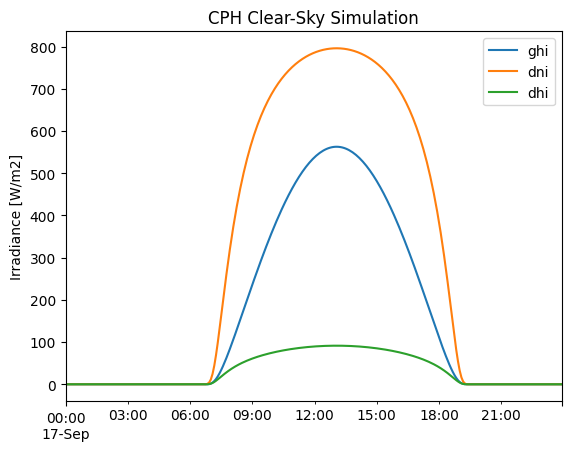

In [3]:
clearsky_irradiance.plot(ylabel='Irradiance [W/m2]', title='CPH Clear-Sky Simulation')

If you want to look up how to use a function, you can find its page in the [pvlib documentation](https://pvlib-python.readthedocs.io/en/stable/reference/index.html).

## Step 3: Irradiance data
Now, let's get serious and get some actual irradiance data. For this purpose, we will use pvlib's iotools module. You can read about the type of weather data supported [here](https://pvlib-python.readthedocs.io/en/stable/user_guide/weather_data.html).

In this tutorial, we will retrieve TMY irradiance data from PVGIS. The relevant pvlib function is [pvlib.iotools.get_pvgis_tmy](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_tmy.html).

Can you figure out how to download data for Copenhagen?

In [15]:
# Write your code here to retrieve irradiance data

data, months, inputs, meta = pvlib.iotools.get_pvgis_tmy(
    latitude=cph.latitude,
    longitude=cph.longitude,
    startyear=2005,
    endyear=2015
)

# set the year for all timestamps to be the same
# this makes nice plots instead of showing the actual
# year from when the months were selected
data.index = [i.replace(year=1999) for i in data.index]

data.head(24)

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
1999-01-01 00:00:00+00:00,6.32,93.15,0.0,0.00,0.0,301.58,9.72,178.0,100584.0
1999-01-01 01:00:00+00:00,6.06,93.63,0.0,0.00,0.0,305.53,9.62,177.0,100530.0
1999-01-01 02:00:00+00:00,5.80,94.10,0.0,0.00,0.0,309.49,9.51,176.0,100477.0
1999-01-01 03:00:00+00:00,5.54,94.58,0.0,0.00,0.0,313.44,9.41,176.0,100401.0
1999-01-01 04:00:00+00:00,5.29,95.06,0.0,0.00,0.0,317.40,9.31,176.0,100324.0
1999-01-01 05:00:00+00:00,5.03,95.54,0.0,0.00,0.0,321.35,9.21,176.0,100248.0
1999-01-01 06:00:00+00:00,4.77,96.01,0.0,0.00,0.0,325.31,9.11,178.0,100165.0
1999-01-01 07:00:00+00:00,4.51,96.49,0.0,0.00,0.0,329.26,9.01,179.0,100081.0
1999-01-01 08:00:00+00:00,6.85,97.54,2.0,0.00,2.0,330.80,9.34,180.0,99998.0
1999-01-01 09:00:00+00:00,7.05,97.72,14.0,0.00,14.0,334.63,8.58,194.0,99965.0


## Step 4: Calculate solar position

When using irradiance data, we almost always need to know the solar position for each time step.

Can you figure out how to calculate the solar position for the time steps of the time series downloaded in the previous step?

*Hint: the time steps are the index of the DataFrame from the previous step, use DataFrame.index.*

In [16]:
# Write your code here to calculate solar position
solar_position = pvlib.solarposition.get_solarposition(
    time=data.index,
    latitude=cph.latitude,
    longitude=cph.longitude,
)

solar_position.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
1999-01-01 00:00:00+00:00,146.232013,146.232013,-56.232013,-56.232013,19.700064,-3.153257
1999-01-01 01:00:00+00:00,141.872802,141.872802,-51.872802,-51.872802,42.118684,-3.172984
1999-01-01 02:00:00+00:00,135.270622,135.270622,-45.270622,-45.270622,60.512638,-3.192702
1999-01-01 03:00:00+00:00,127.435653,127.435653,-37.435653,-37.435653,75.692364,-3.212411
1999-01-01 04:00:00+00:00,119.072548,119.072548,-29.072548,-29.072548,88.843236,-3.232112


## Step 5: Calculate plane of array irradiance
The irradiance data we have obtained contains the three components:
- global horizontal irradiance (GHI)
- diffuse horizontal irraddiance (DHI)
- direct normal irradiance (DNI)

If you are unsure what these terms refer to, have a look [here](https://www.solaranywhere.com/support/data-fields/definitions/).

However, to determine solar energy generation we are interested in the plane of array (POA) irradiance also known as global tilted irradiance (GTI). To transpose the standard irradiance components to tilted irradiance we need to use a transposition model.

Can you find the suitable pvlib function to calculate plane of array irradiance and calculate the irradiance for a south-facing system with a 40-degree tilt?

Note, `poa_diffuse` corresponds to $G_d$ and `poa_direct` corresponds to $G_b$.

In [17]:
# Write your code here to calculate plane of array irradiance
poa = pvlib.irradiance.get_total_irradiance(
    surface_tilt=45,
    surface_azimuth=180,
    solar_zenith=solar_position['zenith'],
    solar_azimuth=solar_position['azimuth'],
    dni=data['dni'],
    ghi=data['ghi'],
    dhi=data['dhi'],
)

poa.head(12)

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
1999-01-01 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000
1999-01-01 01:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000
1999-01-01 02:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000
1999-01-01 03:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000
1999-01-01 04:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000
1999-01-01 05:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000
1999-01-01 06:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000
1999-01-01 07:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000
1999-01-01 08:00:00+00:00,1.780330,0.000000,1.780330,1.707107,0.073223
1999-01-01 09:00:00+00:00,12.462311,0.000000,12.462311,11.949747,0.512563


# Step 6: Calculate Angle of Incidence

In this exercise we'll investigate a system with the following characteristics:
- Tilt: 40 degrees
- Orientation: south-facing (azimuth=180)

Based on this information, calculate the incidence angle modifier for each time step:

In [18]:
# Write your code to calculate the incidence angle (there's a pvlib function for that) and the incidence angle modifier (IAM)
aoi = pvlib.irradiance.aoi(
    surface_tilt=45,
    surface_azimuth=180,
    solar_zenith=solar_position['zenith'],
    solar_azimuth=solar_position['azimuth'],
)

aoi = aoi.clip(upper=90)  # max aoi is 90 degrees

b_0 = 0.09

K_b = 1 - b_0 * (1/np.cos(np.deg2rad(aoi)) - 1)

# enforce lower limit as IAM cannot be negative
K_b = K_b.clip(lower=0)

# Step 7: Calculate thermal power
With a few assumptions it's easy to calculate the thermal power. The assumptions we'll make are:
- steady state operation (meaning dT/dt is zero)
- mean fluid temperature: 20 °C
- panel area: 2 m²
- collector type: uncovered

<Axes: >

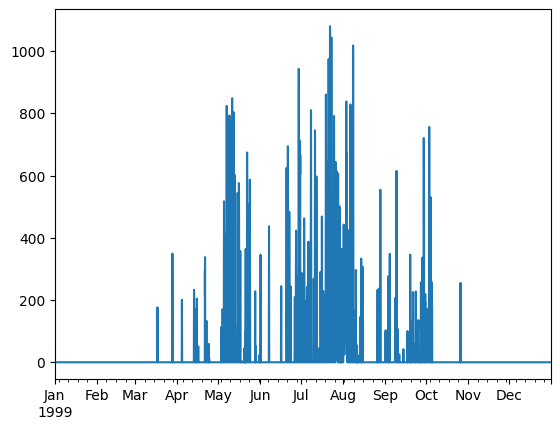

In [41]:
# Write your code to calculate the thermal power output
area = 2
T_mean = 20

# uncovered collector
eta_0b = 0.58
a_1 = 12.5
a_2 = 0
a_3 = 1.38
a_6 = 0.06
K_d = 0.9

Q = area*(eta_0b*K_b*poa['poa_direct'] + eta_0b*K_d*poa['poa_diffuse'] - a_1*(T_mean-data['temp_air']) - a_2*(T_mean-data['temp_air'])**2 - a_3*data['wind_speed']*(T_mean-data['temp_air']) - a_6*data['wind_speed']*(poa['poa_diffuse'] + poa['poa_direct']))

# remove negative power as this is periods with heat loss
# where the system will not operate
Q = Q.clip(lower=0)

Q.plot()

Text(0, 0.5, 'Thermal heat generation [kWh]')

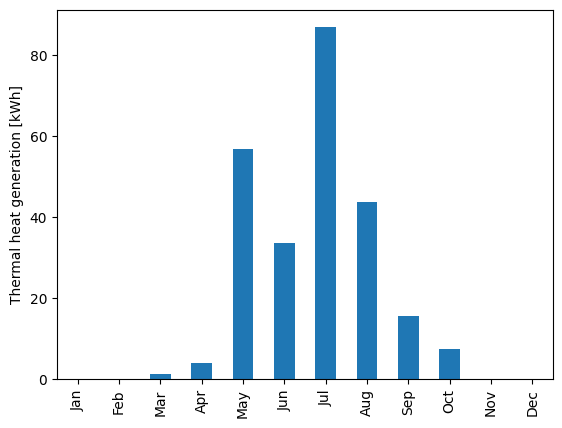

In [43]:
Q_monthly =  Q.resample('1M').sum()/1000
Q_monthly.index = [d.strftime('%b') for d in Q_monthly.index]
ax = Q_monthly.plot.bar()
ax.set_ylabel('Thermal heat generation [kWh]')

# Step 8: Evaluate the impact of fluid temperature

The thermal performance is highly dependent on the fluid temperature. Plot the thermal power output for the following temperatures:
- 20 °C
- 30 °C
- 40 °C
- 50 °C

In [47]:
# Write your code to plot the heat generation
Qs = pd.DataFrame()
for T_mean in [0, 20, 30, 40, 50]:
    Q = area*(eta_0b*K_b*poa['poa_direct'] + eta_0b*K_d*poa['poa_diffuse'] - a_1*(T_mean-data['temp_air']) - a_2*(T_mean-data['temp_air'])**2 - a_3*data['wind_speed']*(T_mean-data['temp_air']) - a_6*data['wind_speed']*(poa['poa_diffuse'] + poa['poa_direct']))
    Qs[T_mean] = Q.clip(lower=0)

Qs.head()

,0,20,30,40,50
1999-01-01 00:00:00+00:00,327.547904,0.0,0.0,0.0,0.0
1999-01-01 01:00:00+00:00,312.400272,0.0,0.0,0.0,0.0
1999-01-01 02:00:00+00:00,297.236080,0.0,0.0,0.0,0.0
1999-01-01 03:00:00+00:00,282.382664,0.0,0.0,0.0,0.0
1999-01-01 04:00:00+00:00,268.179724,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Thermal heat generation [kWh]')

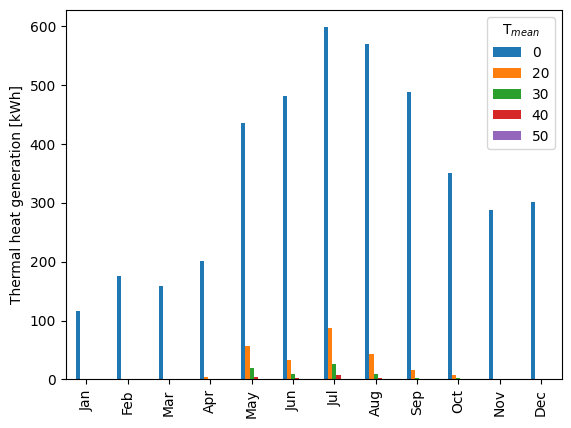

In [48]:
Qs_monthly = Qs.resample('MS').sum() / 1000
Qs_monthly.index = [d.strftime('%b') for d in Qs_monthly.index]
ax = Qs_monthly.plot.bar()
ax.legend(title='T$_{mean}$')
ax.set_ylabel('Thermal heat generation [kWh]')

# Extra: Calculate PV power

With the plane of array irradiance and assuming the module temperature is equal to the PVT outlet temperature, we can now estimate the PV output power.  There are several modeling approaches available here, including:

* Simple efficiency (like in PVWatts v5)
* Single-diode models, like in PVsyst and SAM
* Empirical methods like the SAPM

Each type of these PV models requires different types of parameters.  They all produce estimates of the maximum power point (MPP), while the fancier ones also estimate other quantities like open circuit voltage and short circuit current.

The simplest option is to use [pvlib.pvsystem.pvwatts_dc](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.pvsystem.pvwatts_dc.html).  Can you use it with the POA irradiance and module temperature to estimate the output power for a 300 W module with a temperature coefficient of -0.004?

In [ ]:
# Write your code here to calculate PV power